## <center> Análise da base de Alimentos Regularizados e Situação do Registro </center>

#### <center> 📈 Análise de Dados 📉

#### Importações

In [ ]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn import tree

#### Consumindo a base vinda de um arquivo pickle

In [17]:
base = pickle.load(open('base_consumo', 'rb'))

display(base)

,Country,PopulationGroup,ConsumptionCategory,ConsumptionSpecificity,GramsPerDays,Days,GramsOneDay
0,Austria,Adults,Alcoholic beverages,Alcoholic beverages,2123,7,303.3
1,Austria,Adults,Alcoholic beverages,Beer and beer-like beverage,2123,7,303.3
2,Austria,Adults,Alcoholic beverages,Beer and beer-like beverage,2123,7,303.3
3,Austria,Adults,Alcoholic beverages,Beer and beer-like beverage,2123,7,303.3
4,Austria,Adults,Alcoholic beverages,Beer and beer-like beverage,2123,7,303.3
...,...,...,...,...,...,...,...
307079,United Kingdom,Toddlers,Water and water-based beverages,Water based beverages,5217,6,869.5
307080,United Kingdom,Toddlers,Water and water-based beverages,Water based beverages,5217,6,869.5
307081,United Kingdom,Toddlers,Water and water-based beverages,Water based beverages,5217,6,869.5
307082,United Kingdom,Toddlers,Water and water-based beverages,Water based beverages,5217,6,869.5


In [18]:
base = base[base['PopulationGroup'].isin(['Pregnant women', 'Lactating women'])].dropna()
display(base)

,Country,PopulationGroup,ConsumptionCategory,ConsumptionSpecificity,GramsPerDays,Days,GramsOneDay
16185,Estonia,Lactating women,Alcoholic beverages,Beer and beer-like beverage,763,7,109.0
16186,Estonia,Lactating women,Alcoholic beverages,Beer and beer-like beverage,763,7,109.0
16187,Estonia,Lactating women,Alcoholic beverages,Beer and beer-like beverage,763,7,109.0
16188,Estonia,Lactating women,Alcoholic beverages,Beer and beer-like beverage,763,7,109.0
16189,Estonia,Lactating women,Alcoholic beverages,Unsweetened spirits and liqueurs,763,7,109.0
...,...,...,...,...,...,...,...
291060,Portugal,Pregnant women,Water and water-based beverages,Water based beverages,301,6,50.2
291061,Portugal,Pregnant women,Water and water-based beverages,Water based beverages,301,6,50.2
291062,Portugal,Pregnant women,Water and water-based beverages,Water based beverages,301,6,50.2
291063,Portugal,Pregnant women,Water and water-based beverages,Water based beverages,301,6,50.2


#### Separando atributos e respostas

In [19]:
df_resposta = base['ConsumptionCategory']
df_atributos = base.drop(columns='ConsumptionCategory')

#### Transformando dados

In [20]:
label_encoder = LabelEncoder()

y_encoded = label_encoder.fit_transform(df_resposta)

preprocessador = ColumnTransformer(transformers=[('categoricas', OrdinalEncoder(), make_column_selector(dtype_include=['object','bool']))],
                                    remainder='passthrough',
                                    verbose_feature_names_out=False)

x_enconded = preprocessador.fit_transform(df_atributos)

with open('preprocessador.pkl', mode='wb') as f:
    pickle.dump(preprocessador, f)

classifier = GaussianNB()

#### <center> Naive Bayes

#### Com Cross Val e OverSample

Melhor valor de k: 5
Cross-Validation Scores: [0.29723805 0.30607323 0.31878974 0.31703574 0.29708397]
Mean Accuracy: 0.3072441465444646
Confusion Matrix:
[[   1  317    2    0  544    9    2    3    3   62   23    9   44    1
     0    0    0    4    0    8   54]
 [   0  595    0   65    0  134    0    0    0   87    0   70   12    3
     0  114    0    0    0    6    0]
 [   0    0  863    0    0    1    0   10    0    0    0   17   10    0
     0  174    0    0    0   11    0]
 [   0    0    0  167  119  177  123    2    9  353    1   14    9    0
     0   90    0    0    0   22    0]
 [   0    0    0    0  557    0  237   96    0    0  115    9   35    0
     0    0    0   19    0   18    0]
 [   0    2    3    6    0  456   43   16    5   54   51   86    3    4
     0  337    0    0    0   20    0]
 [   0    0   88    0   82    0  684    0    0    0  123   58    0    0
     0   40    0    0    0   11    0]
 [   0    0    0    0    0   11  235   56  165    0  115   13   22    0
   

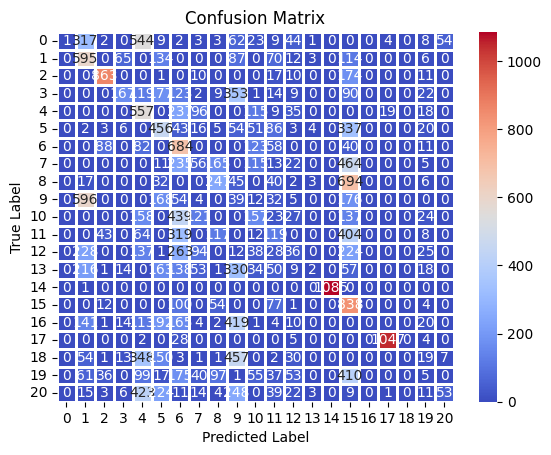

In [21]:
# Aplicar SMOTE
smote = SMOTE()
x_transformed, y_transformed = smote.fit_resample(x_enconded, y_encoded)

k_values = []
accuracies = []
maior_acuracia = -1
cv_final = 0
contador = 0

# Loop para encontrar o melhor valor de separação
for i in range(10):
    k = 2 + contador
    cv_scores = cross_val_score(classifier, x_transformed, y_transformed, cv=k, scoring='accuracy')
    media = cv_scores.mean()

    k_values.append(k)
    accuracies.append(media)

    if media > maior_acuracia:
        maior_acuracia = media
        cv_final = k

    contador = contador + 1

print(f"Melhor valor de k: {cv_final}")

# Ajustar valor de cv para algo razoável, como 5 ou 10
cv_scores = cross_val_score(classifier, x_transformed, y_transformed, cv=cv_final, scoring='accuracy')

print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy:", cv_scores.mean())

# Usar y_transformed para a matriz de confusão
conf_matrix = confusion_matrix(y_transformed, cross_val_predict(classifier, x_transformed, y_transformed, cv=cv_final))
print('Confusion Matrix:')
print(conf_matrix)

sns.heatmap(conf_matrix, cmap='coolwarm', annot=True, linewidth=1, fmt='d')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

#### Com Cross Val e UnderSample

C:\Users\liviapisanello-ieg\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 23 members, which is less than n_splits=24.
  warnings.warn(
C:\Users\liviapisanello-ieg\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 23 members, which is less than n_splits=25.
  warnings.warn(
C:\Users\liviapisanello-ieg\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 23 members, which is less than n_splits=26.
  warnings.warn(
C:\Users\liviapisanello-ieg\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 23 members, which is less than n_splits=27.
  warnings.warn(
C:\Users\liviapisanello-ieg\AppData\Roaming\Python\Python311\site-packages\sklearn\model

3
Cross-Validation Scores: [0.64147287 0.71650485 0.72815534]
Mean Accuracy: 0.6953776874639371
Confusion Matrix:
[[  2   0   0   2   2   0   2   0   0   9   1   1   1   0   0   0   0   0
    3   0   0]
 [  0   0   0   0   0   0   0   0   0  22   0   0   0   1   0   0   0   0
    0   0   0]
 [  0   0  12   0   0   1   1   0   0   6   0   0   0   0   0   3   0   0
    0   0   0]
 [  1   0   0   3   3   0   1   0   0  14   0   0   0   0   0   0   0   0
    0   0   1]
 [  1   0   0   2   5   0   5   4   0   0   3   2   0   0   0   0   0   0
    0   1   0]
 [  0   0   0   0   0   0   1   0   0  19   1   0   0   0   0   0   0   0
    0   1   1]
 [  0   0   2   0   3   0  11   0   0   3   1   0   0   0   0   1   0   0
    0   2   0]
 [  0   0   0   0   2   0   7   2   0   8   1   0   0   0   0   0   0   0
    0   1   2]
 [  0   0   0   0   0   0   0   0   0  23   0   0   0   0   0   0   0   0
    0   0   0]
 [  0   3   0   4   0  15  50   3   0 981  12   5   0   1   0   0   0   0
    0   4  

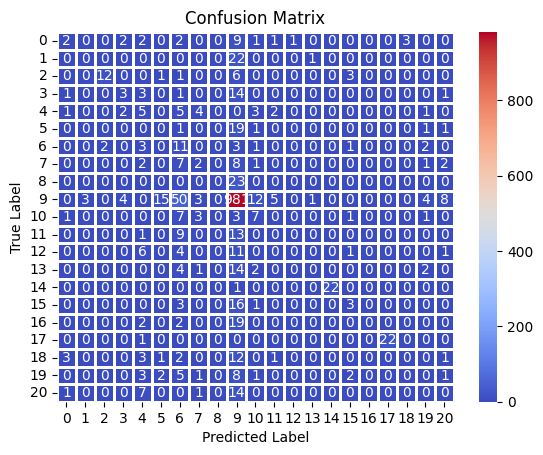

In [22]:
rus = RandomUnderSampler(random_state=42, sampling_strategy='not majority')

# Realiza o undersampling
X_resampled, y_resampled = rus.fit_resample(x_enconded, y_encoded)

k_values = []
accuracies = []
maior_acuracia = -1
cv_final = 0

# Loop para encontrar o melhor valor de separações
for contador in range(50):
    k = 2 + contador
    cv_scores = cross_val_score(classifier, X_resampled, y_resampled, cv=k, scoring='accuracy')
    media = cv_scores.mean()

    k_values.append(k)
    accuracies.append(media)

    if media > maior_acuracia:
        maior_acuracia = media
        cv_final = k
print(cv_final)

cv_scores = cross_val_score(classifier, X_resampled, y_resampled, cv=cv_final, scoring='accuracy')

print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy:", cv_scores.mean())

conf_matrix = confusion_matrix(y_resampled, cross_val_predict(classifier, X_resampled, y_resampled, cv=5))
print('Confusion Matrix:')
print(conf_matrix)

sns.heatmap(conf_matrix, cmap='coolwarm', annot=True, linewidth=1, fmt='d')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


#### Sem CrossVal com UnderSample

C:\Users\liviapisanello-ieg\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\liviapisanello-ieg\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\liviapisanello-ieg\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         9
           1       0.00      0.00      0.00         6
           2       1.00      0.25      0.40         8
           3       0.00      0.00      0.00         5
           4       0.00      0.00      0.00         4
           5       0.00      0.00      0.00         1
           6       0.10      0.50      0.17         6
           7       0.00      0.00      0.00         5
           8       0.00      0.00      0.00         6
           9       0.84      0.92      0.88       277
          10       0.00      0.00      0.00         3
          11       0.00      0.00      0.00         4
          12       0.00      0.00      0.00         7
          13       0.00      0.00      0.00         8
          14       1.00      1.00      1.00         5
          15       0.00      0.00      0.00         4
          16       0.00      0.00      0.00         5
          17       1.00    

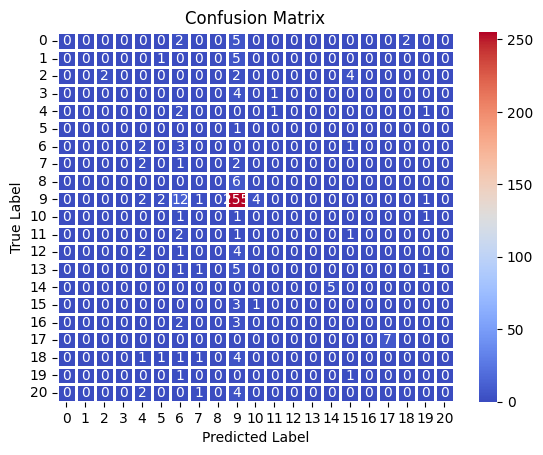

In [23]:
rus = RandomUnderSampler(random_state=42, sampling_strategy = 'not majority')

X_resampled, y_X_resampled = rus.fit_resample(x_enconded, y_encoded)

x_treino, x_teste, y_treino, y_teste = train_test_split(X_resampled, y_X_resampled, test_size=0.25, random_state=0)

treinando = classifier.fit(x_treino, y_treino)

previsao = classifier.predict(x_teste)

report = classification_report(y_teste, previsao)
print(report)

conf_matrix = confusion_matrix(y_teste, previsao)
print('Confusion Matrix:')
print(conf_matrix)

sns.heatmap(conf_matrix, cmap='coolwarm', annot=True, linewidth=1, fmt='d')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

#### Sem CrossVal com OverSample

C:\Users\liviapisanello-ieg\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\liviapisanello-ieg\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\liviapisanello-ieg\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       292
           1       0.33      0.56      0.41       288
           2       0.80      0.76      0.78       265
           3       0.00      0.00      0.00       259
           4       0.20      0.47      0.28       281
           5       0.25      0.44      0.32       301
           6       0.21      0.59      0.31       264
           7       0.15      0.10      0.12       254
           8       0.42      0.11      0.17       282
           9       0.07      0.17      0.10       257
          10       0.21      0.14      0.16       271
          11       0.18      0.12      0.15       277
          12       0.09      0.01      0.02       287
          13       0.00      0.00      0.00       262
          14       1.00      1.00      1.00       271
          15       0.18      0.79      0.29       249
          16       0.00      0.00      0.00       268
          17       0.98    

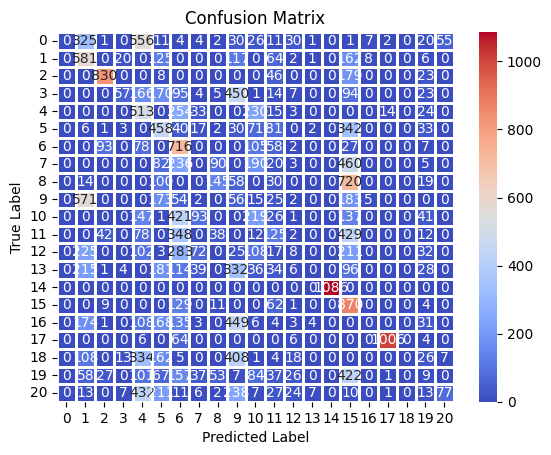

In [24]:
smote = SMOTE()

x_transformed, y_transformed = smote.fit_resample(x_enconded, y_encoded)

x_treino, x_teste, y_treino, y_teste = train_test_split(x_transformed, y_transformed, test_size=0.25, random_state=0)

treinando = classifier.fit(x_treino, y_treino)

previsao = classifier.predict(x_teste)

report = classification_report(y_teste, previsao)
print(report)

conf_matrix = confusion_matrix(y_transformed, cross_val_predict(classifier, x_transformed, y_transformed, cv=5))
print('Confusion Matrix:')
print(conf_matrix)

sns.heatmap(conf_matrix, cmap='coolwarm', annot=True, linewidth=1, fmt='d')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

#### PCA com atributos para Naive Bayes

In [25]:
pca = PCA(n_components=5)
pca.fit(x_enconded)

PCA(n_components=5)

In [26]:
print(pca.explained_variance_ratio_)
print(pca.singular_values_)

[9.83981351e-01 1.48725149e-02 1.14036129e-03 3.61358387e-06
 2.13801886e-06]
[56812.86542482  6984.66316749  1934.08026697   108.87353641
    83.7450269 ]


#### Treinando modelo com as alterações do PCA e UnderSample

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         9
           1       0.00      0.00      0.00         6
           2       1.00      0.62      0.77         8
           3       0.00      0.00      0.00         5
           4       0.17      0.50      0.25         4
           5       0.00      0.00      0.00         1
           6       0.11      0.33      0.16         6
           7       0.00      0.00      0.00         5
           8       1.00      0.33      0.50         6
           9       0.83      0.93      0.88       277
          10       0.00      0.00      0.00         3
          11       0.00      0.00      0.00         4
          12       0.00      0.00      0.00         7
          13       0.00      0.00      0.00         8
          14       1.00      0.60      0.75         5
          15       0.00      0.00      0.00         4
          16       0.00      0.00      0.00         5
          17       1.00    

C:\Users\liviapisanello-ieg\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\liviapisanello-ieg\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\liviapisanello-ieg\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

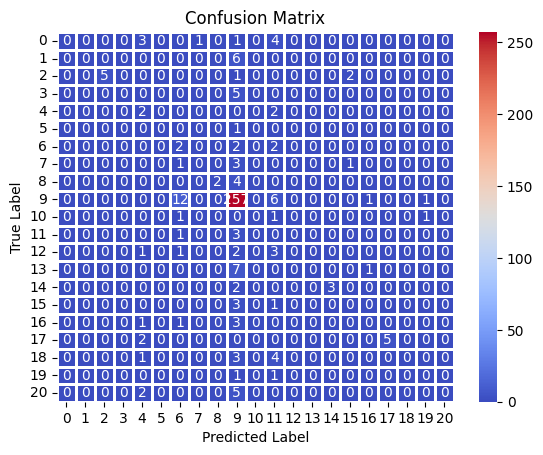

In [27]:
reduced_x = pca.transform(x_enconded)

rus = RandomUnderSampler(random_state=0, sampling_strategy = 'not majority')

x_resampled, y_resampled = rus.fit_resample(reduced_x, y_encoded)
0
x_treino, x_teste, y_treino, y_teste = train_test_split(x_resampled, y_resampled, test_size=0.25, random_state=0)

treinando = classifier.fit(x_treino, y_treino)

previsao = classifier.predict(x_teste)

report = classification_report(y_teste, previsao)
print(report)

conf_matrix = confusion_matrix(y_teste, previsao)
print('Confusion Matrix:')
print(conf_matrix)

sns.heatmap(conf_matrix, cmap='coolwarm', annot=True, linewidth=1, fmt='d')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

#### Treinando modelo com as alterações do PCA, UnderSample e CrossVal

C:\Users\liviapisanello-ieg\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 23 members, which is less than n_splits=24.
  warnings.warn(
C:\Users\liviapisanello-ieg\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 23 members, which is less than n_splits=25.
  warnings.warn(
C:\Users\liviapisanello-ieg\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 23 members, which is less than n_splits=26.
  warnings.warn(
C:\Users\liviapisanello-ieg\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 23 members, which is less than n_splits=27.
  warnings.warn(
C:\Users\liviapisanello-ieg\AppData\Roaming\Python\Python311\site-packages\sklearn\model

42


C:\Users\liviapisanello-ieg\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 23 members, which is less than n_splits=42.
  warnings.warn(


Cross-Validation Scores: [0.72972973 0.75675676 0.75675676 0.43243243 0.75675676 0.75675676
 0.7027027  0.7027027  0.75675676 0.7027027  0.56756757 0.62162162
 0.72972973 0.18918919 0.72972973 0.72972973 0.59459459 0.72972973
 0.7027027  0.75675676 0.72972973 0.7027027  0.75675676 0.75675676
 0.48648649 0.78378378 0.72972973 0.72972973 0.7027027  0.75675676
 0.75675676 0.7027027  0.72972973 0.72972973 0.41666667 0.72222222
 0.69444444 0.66666667 0.72222222 0.69444444 0.77777778 0.69444444]
Mean Accuracy: 0.6868654368654368
Confusion Matrix:
[[  2   0   0   0  11   0   0   0   0   5   1   3   0   0   0   0   0   0
    1   0   0]
 [  0   0   0   0   0   0   0   0   0  21   0   0   0   2   0   0   0   0
    0   0   0]
 [  0   0  12   0   0   0   0   0   0   9   0   1   0   0   0   1   0   0
    0   0   0]
 [  0   0   0   0   3   0   1   0   0  18   1   0   0   0   0   0   0   0
    0   0   0]
 [  1   0   0   0   8   0   2   0   0   0   5   3   1   0   0   0   0   0
    1   0   2]
 [  0   

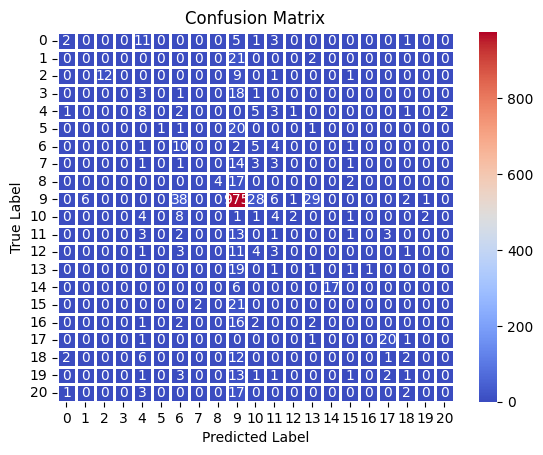

In [28]:
reduced_x = pca.transform(x_enconded)

rus = RandomUnderSampler(random_state=0, sampling_strategy = 'not majority')

x_resampled, y_resampled = rus.fit_resample(reduced_x, y_encoded)

sep_values = []
accuracies = []
maior_acuracia = -1
cv_final = 0

# Loop para encontrar o melhor valor de separação
for contador in range(50):
    k = 2 + contador
    cv_scores = cross_val_score(classifier, x_resampled, y_resampled, cv=k, scoring='accuracy')
    media = cv_scores.mean()

    sep_values.append(k)
    accuracies.append(media)

    if media > maior_acuracia:
        maior_acuracia = media
        cv_final = k

print(cv_final)

# Executa a validação cruzada com a melhor separação
cv_scores = cross_val_score(classifier, x_resampled, y_resampled, cv=cv_final, scoring='accuracy')

print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy:", cv_scores.mean())

conf_matrix = confusion_matrix(y_resampled, cross_val_predict(classifier, x_resampled, y_resampled, cv=5))
print('Confusion Matrix:')
print(conf_matrix)

sns.heatmap(conf_matrix, cmap='coolwarm', annot=True, linewidth=1, fmt='d')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


Acabei não colocando o Grid, pois descobri os melhores valores manualmente

#### <center> KNN

#### KNN com menor K

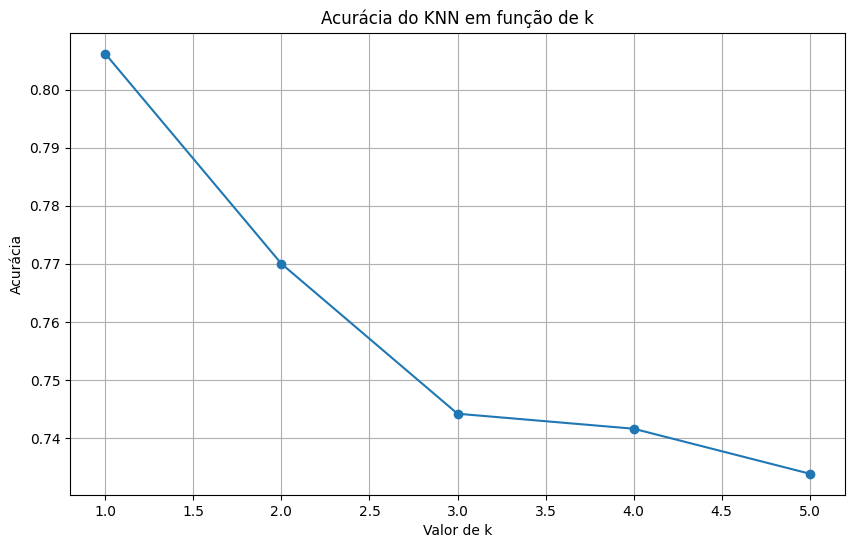

O melhor valor de k é: 5, com uma acurácia de: 0.7338501291989664


In [29]:
k_values = []
accuracies = []
maior_acuracia = 1
k_final = 0

for contador in range(5):
    k = 1 + contador
    classificador_knn = KNeighborsClassifier(n_neighbors=k)
    classificador_knn.fit(x_treino, y_treino)

    previsao_knn = classificador_knn.predict(x_teste)
    acuracia = accuracy_score(y_teste, previsao_knn)

    k_values.append(k)
    accuracies.append(acuracia)

    if acuracia < maior_acuracia:
        maior_acuracia = acuracia
        k_final = k

plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, marker='o', linestyle='-')
plt.title('Acurácia do KNN em função de k')
plt.xlabel('Valor de k')
plt.ylabel('Acurácia')
plt.grid(True)
plt.show()

print(f"O melhor valor de k é: {k_final}, com uma acurácia de: {maior_acuracia}")


#### Criando um classificador com o K de valor mais baixo

In [30]:
classificador_knn = KNeighborsClassifier(n_neighbors=k_final)

#### Treinando com CrossVal

Melhor k para Cross-Validation: 2
Cross-Validation Scores: [0.59511672 0.76737322]
Mean Accuracy: 0.6812449691440837
Confusion Matrix:
[[  3   0   0   0   5   0   1   1   0   4   0   1   1   1   1   0   0   1
    3   0   1]
 [  2  11   0   0   0   0   0   0   0   5   0   0   0   1   3   0   0   0
    0   1   0]
 [  0   0  15   1   0   0   0   0   3   0   0   3   1   0   0   0   0   0
    0   0   0]
 [  0   1   1  13   0   1   0   1   1   2   1   0   0   0   0   0   0   1
    1   0   0]
 [  4   1   0   0   8   0   2   1   0   4   1   0   0   0   0   0   0   1
    0   0   1]
 [  0   2   0   0   0  12   1   2   0   5   0   0   0   0   0   0   1   0
    0   0   0]
 [  0   0   1   0   2   1   7   1   0   6   1   1   1   1   0   0   0   0
    0   1   0]
 [  1   0   3   3   0   1   1   4   6   3   1   0   0   0   0   0   0   0
    0   0   0]
 [  0   0   2   3   0   1   0   8   8   0   0   0   0   0   0   0   0   0
    0   0   1]
 [ 65 178   7  64  10  97  22   3   6 158  16  13   0 133 161   

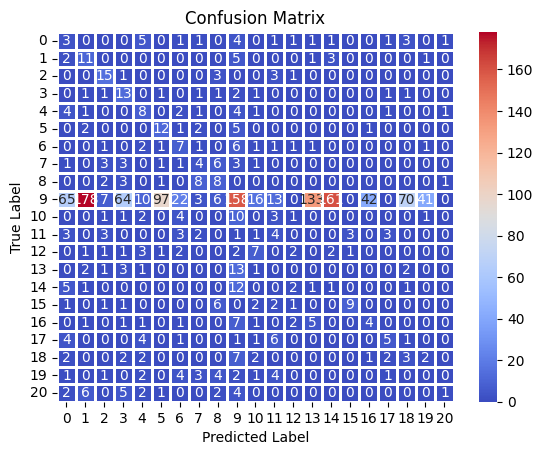

In [31]:
sep_values = []
accuracies = []
maior_acuracia = -1
cv_final = 0

# Loop para encontrar o melhor número de separações para o Cross-Validation
for contador in range(10):
    k = 2 + contador
    # Instanciar o classificador com n_neighbors igual a k
    classificador_knn = KNeighborsClassifier(n_neighbors=k)
    cv_scores = cross_val_score(classificador_knn, x_enconded, y_encoded, cv=k, scoring='accuracy')
    media = cv_scores.mean()

    sep_values.append(k)
    accuracies.append(media)

    if media > maior_acuracia:
        maior_acuracia = media
        cv_final = k

print("Melhor k para Cross-Validation:", cv_final)

# Reavaliação com o melhor k
classificador_knn = KNeighborsClassifier(n_neighbors=cv_final)
cv_scores = cross_val_score(classificador_knn, x_enconded, y_encoded, cv=cv_final, scoring='accuracy')

print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy:", cv_scores.mean())

# Confusion Matrix
conf_matrix = confusion_matrix(y_resampled, cross_val_predict(classificador_knn, x_resampled, y_resampled, cv=5))
print('Confusion Matrix:')
print(conf_matrix)

# Heatmap da Confusion Matrix
sns.heatmap(conf_matrix, cmap='coolwarm', annot=True, linewidth=1, fmt='d')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


#### Testando sem CrossVal

In [32]:
acuracia = accuracy_score( y_teste, previsao_knn)

print(acuracia)

matriz = confusion_matrix(y_teste, previsao_knn)
print(matriz)

0.7338501291989664
[[  1   0   0   0   3   0   0   0   0   1   0   1   0   0   0   0   0   2
    1   0   0]
 [  0   1   0   0   0   0   0   0   0   5   0   0   0   0   0   0   0   0
    0   0   0]
 [  0   0   2   0   0   0   0   0   0   2   0   2   0   0   0   0   0   0
    0   2   0]
 [  0   0   0   1   0   1   0   0   0   2   0   0   0   0   0   1   0   0
    0   0   0]
 [  2   0   0   0   1   0   0   0   0   1   0   0   0   0   0   0   0   0
    0   0   0]
 [  0   0   0   0   0   0   0   0   0   1   0   0   0   0   0   0   0   0
    0   0   0]
 [  0   0   0   0   1   0   1   1   1   1   0   0   1   0   0   0   0   0
    0   0   0]
 [  0   0   1   0   0   2   0   0   1   1   0   0   0   0   0   0   0   0
    0   0   0]
 [  0   0   0   0   0   1   0   0   1   3   0   0   0   0   0   0   0   0
    0   1   0]
 [  0   0   2   0   1   0   0   0   0 272   0   1   1   0   0   0   0   0
    0   0   0]
 [  0   0   0   0   1   0   0   0   0   2   0   0   0   0   0   0   0   0
    0   0   0]
 [

Sem nenhuma outra alteração, o modelo se adequava muito ao treino :/

#### Tentando abaixar a acurácia com UnderSample

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.00      0.00      0.00         2
           2       0.38      0.50      0.43         6
           3       0.28      1.00      0.43         5
           4       0.38      0.60      0.46         5
           5       0.25      0.25      0.25         4
           6       0.00      0.00      0.00         5
           7       0.17      0.20      0.18         5
           8       0.43      0.38      0.40         8
           9       0.25      0.40      0.31         5
          10       0.33      0.09      0.14        11
          11       0.00      0.00      0.00         3
          12       0.00      0.00      0.00         3
          13       0.20      0.11      0.14         9
          14       0.40      0.50      0.44         4
          15       0.00      0.00      0.00         7
          16       0.50      0.40      0.44         5
          17       0.20    

C:\Users\liviapisanello-ieg\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\liviapisanello-ieg\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\liviapisanello-ieg\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

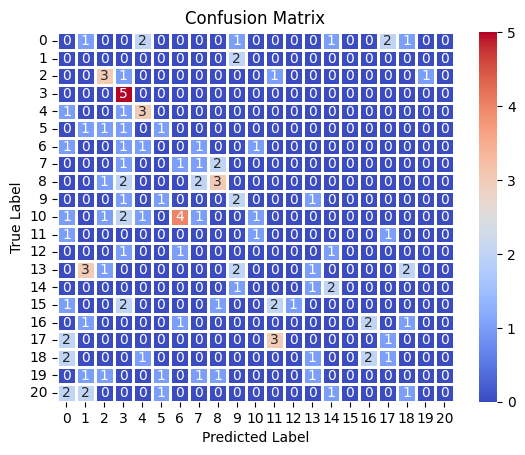

In [33]:
rus = RandomUnderSampler(random_state=0, sampling_strategy = 'auto')

X_resampled, y_resampled = rus.fit_resample(x_enconded, y_encoded)

x_treino, x_teste, y_treino, y_teste = train_test_split(X_resampled, y_resampled, test_size=0.25, random_state=0)

treinandoKNN = classificador_knn.fit(x_treino, y_treino)

previsao = classificador_knn.predict(x_teste)

report = classification_report(y_teste, previsao)
print(report)

conf_matrix = confusion_matrix(y_teste, previsao)
print('Confusion Matrix:')
print(conf_matrix)

sns.heatmap(conf_matrix, cmap='coolwarm', annot=True, linewidth=1, fmt='d')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

#### Tentando abaixar com OverSample e CrossVal

11
Cross-Validation Scores: [0.81243973 0.80183221 0.80568949 0.8287506  0.80173661 0.84081042
 0.82778582 0.81765557 0.81234925 0.80993729 0.83116257]
Mean Accuracy: 0.8172863236667459
Confusion Matrix:
[[ 946    2    2    3   15    6    7    5    1    3    5    6    6    1
    28    0    3    6   26    6    9]
 [  12  992    2   11    0    4    0    0    6   11    0    0   16   11
     7    0    3    0    4    3    4]
 [   2    2 1060    0    0    1   13    0    1    0    0    5    0    0
     0    2    0    0    0    0    0]
 [   2    9    0  955    9   18    8    3    7    2   22   22    4    4
     0    8    1    3    0    7    2]
 [  17    0    0   16  917    0   43    6    0    0   15   10   12    0
     0    0   10   19   12    9    0]
 [   0   13    2   25    2  983    0    3    8    2    4    3    3   24
     1    0    6    0    0    3    4]
 [   7    0   33    7  118    0  818   13    0    6   15   41   17    4
     0    0    0    0    0    7    0]
 [   3    0    0    2    0

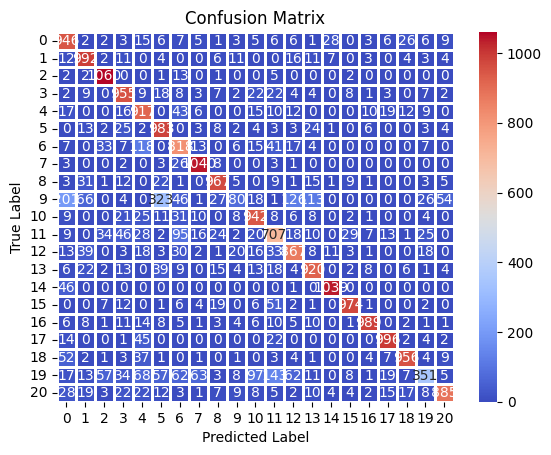

In [34]:
smote = SMOTE()

x_transformed, y_transformed = smote.fit_resample(x_enconded, y_encoded)

sep_values = []
accuracies = []
maior_acuracia = -1
cv_final = 0

# Loop para encontrar o melhor separação de CrossVal
for contador in range(10):
    k = 2 + contador
    cv_scores = cross_val_score(classificador_knn, x_transformed, y_transformed, cv=k, scoring='accuracy')
    media = cv_scores.mean()

    sep_values.append(k)
    accuracies.append(media)

    if media > maior_acuracia:
        maior_acuracia = media
        cv_final = k

print(cv_final)

cv_scores = cross_val_score(classificador_knn, x_transformed, y_transformed, cv=cv_final, scoring='accuracy')

print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy:", cv_scores.mean())

conf_matrix = confusion_matrix(y_transformed, cross_val_predict(classificador_knn, x_transformed, y_transformed, cv=5))
print('Confusion Matrix:')
print(conf_matrix)

sns.heatmap(conf_matrix, cmap='coolwarm', annot=True, linewidth=1, fmt='d')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

#### <center> Gini </center>

#### Antes de modificar os Hyperparams

In [ ]:
# Dividir os dados em conjuntos de treino e teste
# Utilizamos 25% para teste e o restante para treino
x_treino, x_teste, y_treino, y_teste = train_test_split(x_enconded, y_encoded, test_size=0.25, random_state=0)

In [ ]:
# Treinamento do classificador Decision Tree usando o critério de Gini
classificador_gini = tree.DecisionTreeClassifier(criterion='gini')
classificador_gini.fit(x_treino, y_treino)

#### Visualização da árvore de decisão com o critério de Gini

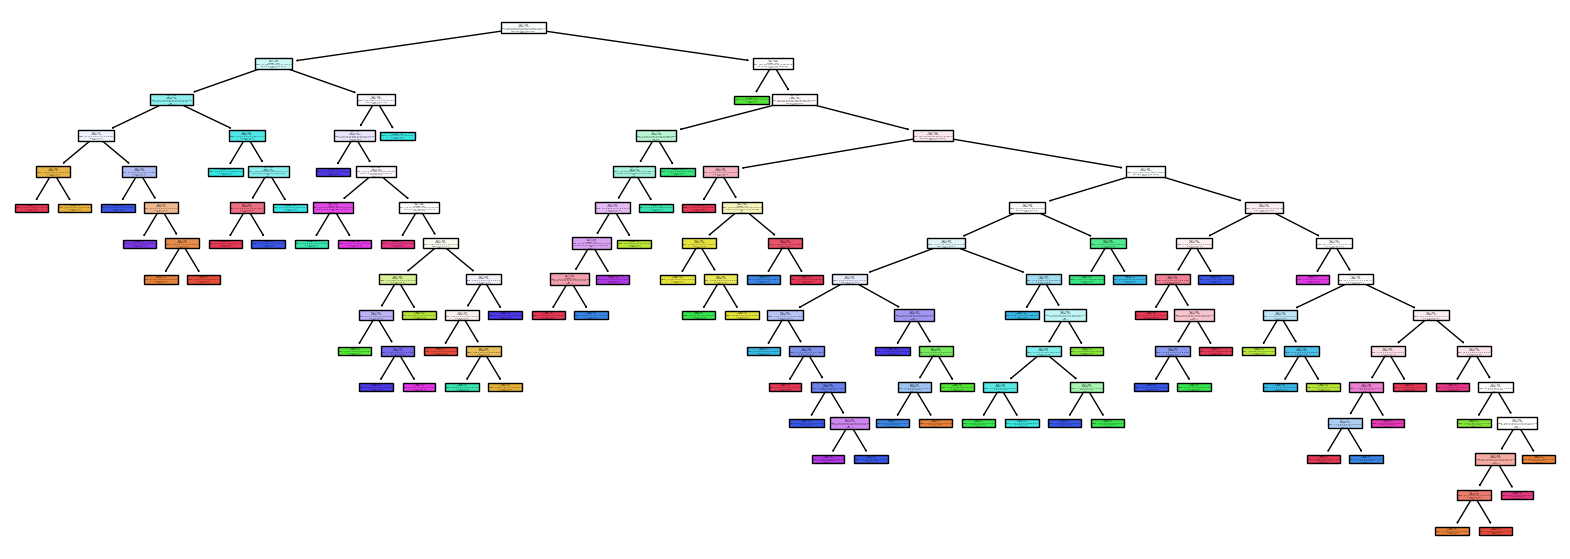

In [ ]:
plt.figure(figsize=(20,7))
tree.plot_tree(classificador_gini, class_names=classificador_gini.classes_.astype(str), filled=True)
plt.show()

In [55]:
# Exibir distribuição dos dados entre treino e teste
print('Distribuição da base: ')
print('Teste:', len(x_teste))
print('Treino:', len(x_treino))
print('\n')
print('Quantia das classes:')
for categoria in base['ConsumptionCategory'].unique():
    print(f"{categoria}: {len(base[base['ConsumptionCategory'] == categoria])}")

Distribuição da base: 
Teste: 1864
Treino: 5590


Quantia das classes:
Alcoholic beverages: 162
Animal and vegetable fats and oils and primary derivatives thereof: 178
Coffee, cocoa, tea and infusions: 294
Composite dishes: 336
Eggs and egg products: 84
Fish, seafood, amphibians, reptiles and invertebrates: 440
Food products for young population: 62
Fruit and fruit products: 811
Fruit and vegetable juices and nectars (including concentrates): 290
Grains and grain-based products: 1086
Legumes, nuts, oilseeds and spices: 483
Major isolated ingredients, additives, flavours, baking and processing aids: 68
Meat and meat products: 534
Milk and dairy products: 544
Other ingredients: 23
Products for non-standard diets, food imitates and food supplements: 145
Seasoning, sauces and condiments: 371
Starchy roots or tubers and products thereof, sugar plants: 63
Sugar and similar, confectionery and water-based sweet desserts: 358
Vegetables and vegetable products: 935
Water and water-based beverage

#### Matriz de confusão

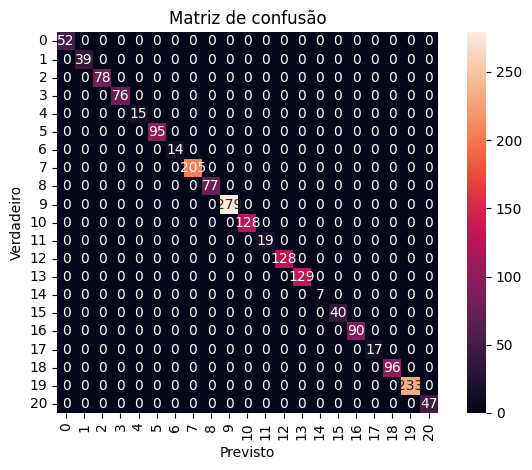

In [ ]:
# Avaliação do classificador Gini - predição e matriz de confusão
y_pred_gini = classificador_gini.predict(x_teste)
matriz_de_confusao = confusion_matrix(y_teste, y_pred_gini)

sns.heatmap(matriz_de_confusao, square=True, annot=True, fmt='d', cbar=True, yticklabels=classificador_gini.classes_, xticklabels=classificador_gini.classes_)
plt.title("Matriz de confusão")
plt.xlabel("Previsto")
plt.ylabel("Verdadeiro")
plt.tight_layout()
plt.show()

In [ ]:
# Profundidade da árvore
print('Profundidade gini:', classificador_gini.tree_.max_depth)
# Quantidade de nós da árvore
print('Quantidade de nós gini: ', classificador_gini.tree_.node_count)

Profundidade gini: 14
Quantidade de nós gini:  143


#### Avaliação de acurácia e relatório de classificação

In [ ]:
previsao_gini = classificador_gini.predict(x_teste)

acuracia = accuracy_score(y_teste, previsao_gini)
print('Acurácia: ', acuracia)

report = classification_report(y_teste, previsao_gini)
print(report)

Acurácia:  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        52
           1       1.00      1.00      1.00        39
           2       1.00      1.00      1.00        78
           3       1.00      1.00      1.00        76
           4       1.00      1.00      1.00        15
           5       1.00      1.00      1.00        95
           6       1.00      1.00      1.00        14
           7       1.00      1.00      1.00       205
           8       1.00      1.00      1.00        77
           9       1.00      1.00      1.00       279
          10       1.00      1.00      1.00       128
          11       1.00      1.00      1.00        19
          12       1.00      1.00      1.00       128
          13       1.00      1.00      1.00       129
          14       1.00      1.00      1.00         7
          15       1.00      1.00      1.00        40
          16       1.00      1.00      1.00        90
          17

### <center> Entropia </center>

#### Antes de modificar os Hyperparams

In [ ]:
# Treinamento de uma árvore de decisão com o critério de entropia
classificador_entropy = DecisionTreeClassifier(criterion='entropy')
classificador_entropy.fit(x_treino, y_treino)

#### Visualização da árvore de decisão com o critério de Entropia

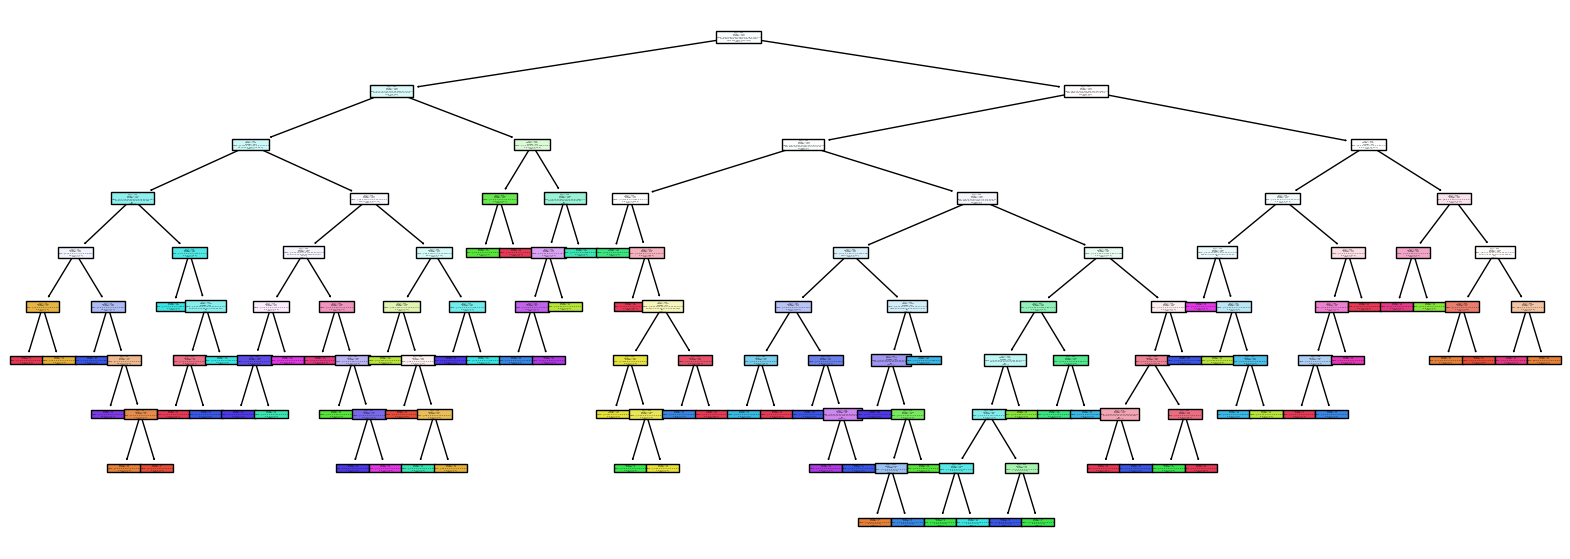

In [ ]:
plt.figure(figsize=(20,7))
tree.plot_tree(classificador_entropy, class_names=classificador_entropy.classes_.astype(str), filled=True)
plt.show()

#### Matriz de confusão

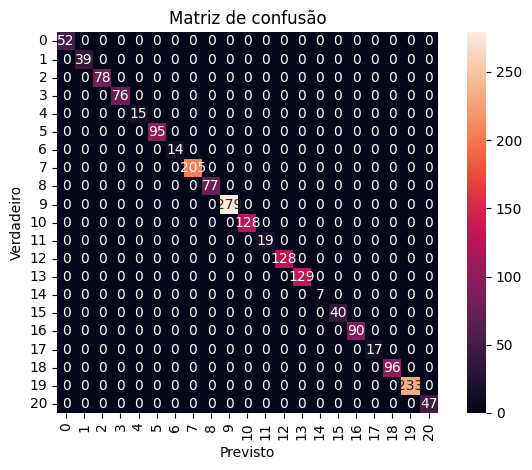

In [ ]:
# Avaliação do classificador Entropia - predição e matriz de confusão
y_pred_entropy = classificador_entropy.predict(x_teste)

matriz_de_confusao_entropy = confusion_matrix(y_teste, y_pred_entropy)

sns.heatmap(matriz_de_confusao_entropy, square=True, annot=True, fmt='d', cbar=True, 
            yticklabels=classificador_entropy.classes_, 
            xticklabels=classificador_entropy.classes_)
plt.title("Matriz de confusão")
plt.xlabel("Previsto")
plt.ylabel("Verdadeiro")
plt.tight_layout()
plt.show()

In [ ]:
# Profundidade da árvore
print('Profundidade entropy:', classificador_entropy.tree_.max_depth)
# Quantidade de nós da árvore
print('Quantidade de nós entropy: ', classificador_entropy.tree_.node_count)

Profundidade entropy: 9
Quantidade de nós entropy:  143


#### Avaliação de acurácia e relatório de classificação

In [ ]:
previsao_entropy = classificador_entropy.predict(x_teste)

acuracia = accuracy_score(y_teste, previsao_entropy)
print('Acurácia: ', acuracia)

report = classification_report(y_teste, previsao_entropy)
print(report)

Acurácia:  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        52
           1       1.00      1.00      1.00        39
           2       1.00      1.00      1.00        78
           3       1.00      1.00      1.00        76
           4       1.00      1.00      1.00        15
           5       1.00      1.00      1.00        95
           6       1.00      1.00      1.00        14
           7       1.00      1.00      1.00       205
           8       1.00      1.00      1.00        77
           9       1.00      1.00      1.00       279
          10       1.00      1.00      1.00       128
          11       1.00      1.00      1.00        19
          12       1.00      1.00      1.00       128
          13       1.00      1.00      1.00       129
          14       1.00      1.00      1.00         7
          15       1.00      1.00      1.00        40
          16       1.00      1.00      1.00        90
          17

#### <center> Depois de modificar os Hyperparams </center>

In [57]:
# Otimização de hiperparâmetros com GridSearchCV
parametros = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 2,4,6,8,10,12],
    'min_samples_split': [2,5,10],
    'min_samples_leaf': [1,2,5,10],
    'max_features': [None, 'sqrt', 'log2']
}
grid = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=parametros, scoring='accuracy')
grid.fit(x_treino, y_treino)
print('Melhores hiperparâmetros:', grid.best_params_)

Melhores hiperparâmetros: {'criterion': 'gini', 'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'splitter': 'random'}


In [58]:
# Treinamento com o melhor modelo obtido no GridSearchCV
melhor_classificador = DecisionTreeClassifier(
    criterion='entropy',
    max_depth=None,
    min_samples_leaf=10,
    min_samples_split=2,
    splitter='best'
)
melhor_classificador.fit(x_treino, y_treino)

DecisionTreeClassifier(criterion='entropy', min_samples_leaf=10)

#### Plotando a árvore depois de modificar os Hyperparams

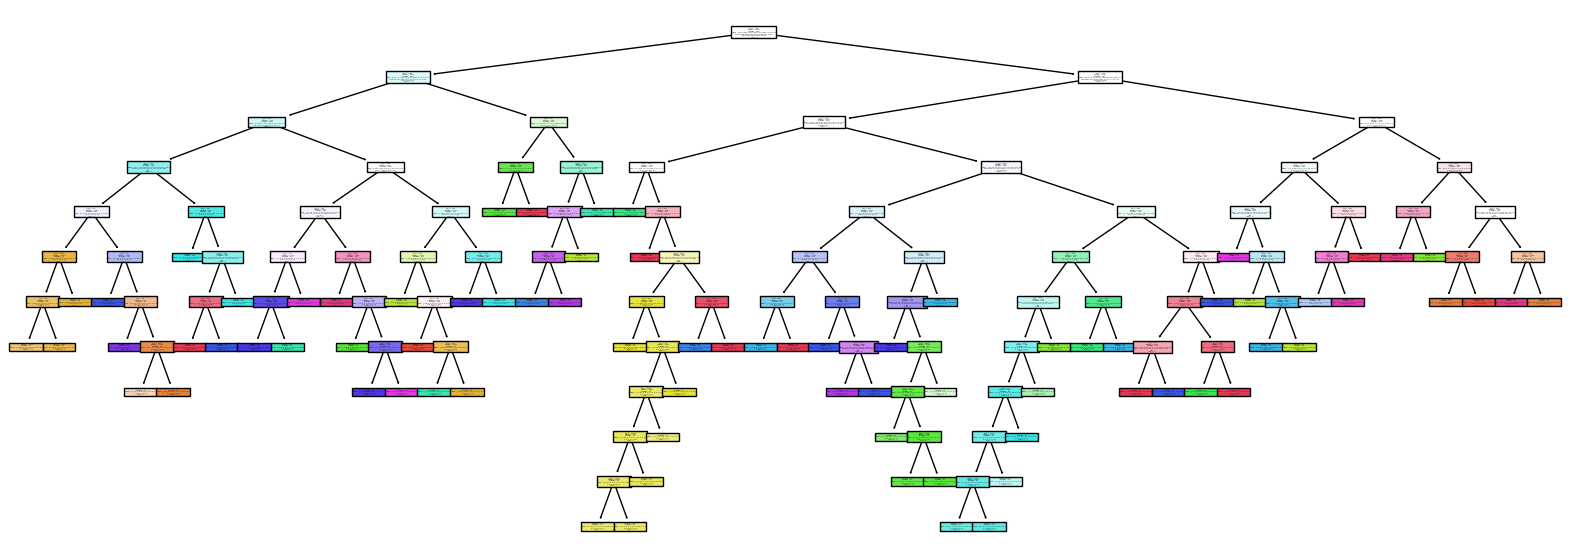

In [ ]:
plt.figure(figsize=(20,7))
tree.plot_tree(melhor_classificador, class_names=melhor_classificador.classes_.astype(str), filled=True)

plt.show()

In [ ]:
# Profundidade da árvore
print('Profundidade gini:', melhor_classificador.tree_.max_depth)
# Quantidade de nós da árvore
print('Quantidade de nós gini: ', melhor_classificador.tree_.node_count)

Profundidade gini: 11
Quantidade de nós gini:  153


#### Matriz de confusão

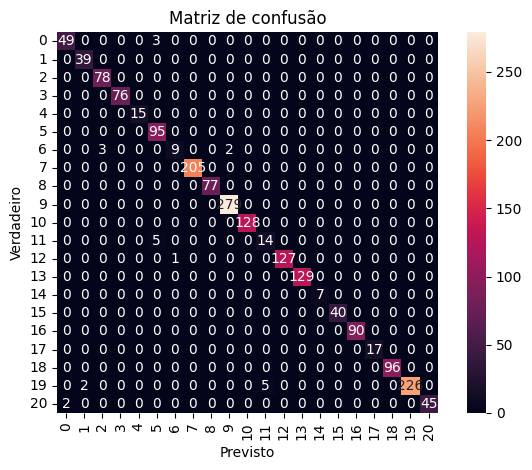

In [ ]:
# Nova matriz de confusão com o melhor classificador
y_pred = melhor_classificador.predict(x_teste)

matriz_de_confusao_gini = confusion_matrix(y_teste, y_pred)

sns.heatmap(matriz_de_confusao_gini, square=True, annot=True, fmt='d', cbar=True, yticklabels=melhor_classificador.classes_, xticklabels=classificador_gini.classes_)
plt.title("Matriz de confusão")
plt.xlabel("Previsto")
plt.ylabel("Verdadeiro")
plt.tight_layout()
plt.show()

#### Avaliação final da acurácia e relatório de classificação

In [ ]:
previsao_gini = melhor_classificador.predict(x_teste)

acuracia = accuracy_score(y_teste, previsao_gini)
print('Acurácia: ', acuracia)

report = classification_report(y_teste, previsao_gini)
print(report)

Acurácia:  0.9876609442060086
              precision    recall  f1-score   support

           0       0.96      0.94      0.95        52
           1       0.95      1.00      0.97        39
           2       0.96      1.00      0.98        78
           3       1.00      1.00      1.00        76
           4       1.00      1.00      1.00        15
           5       0.92      1.00      0.96        95
           6       0.90      0.64      0.75        14
           7       1.00      1.00      1.00       205
           8       1.00      1.00      1.00        77
           9       0.99      1.00      1.00       279
          10       1.00      1.00      1.00       128
          11       0.74      0.74      0.74        19
          12       1.00      0.99      1.00       128
          13       1.00      1.00      1.00       129
          14       1.00      1.00      1.00         7
          15       1.00      1.00      1.00        40
          16       1.00      1.00      1.00        

In [51]:
predict_teste = classificador_gini.predict(x_treino)
print("Classificação:",predict_teste)
acuracia_teste = accuracy_score(y_treino, predict_teste)
print(acuracia_teste)

Classificação: [10  9 18 ... 13 10  3]
1.0


In [52]:
# Avaliar usando cross-validation2
x_resampled, y_resampled = rus.fit_resample(reduced_x, y_encoded)
scores = cross_val_score(melhor_classificador, x_enconded, y_encoded, cv=5, scoring='accuracy')

# Resultados
print(scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[0.99396378 0.98457411 0.99597586 0.99396378 0.99597315]
Accuracy: 0.99 (+/- 0.01)


In [53]:
# Salvar o preprocessador em um arquivo
with open('preprocessador.pkl', 'wb') as f:
    pickle.dump(preprocessador, f)

# Salvar o label_encoder em outro arquivo
with open('label_encoder.pkl', 'wb') as f:
    pickle.dump(label_encoder, f)


In [54]:
with open('melhor_modelo.pkl', mode='wb') as f:
    pickle.dump(melhor_classificador, f)